# TODO: handle nan values, label encode non integer values

In [38]:
import pandas as pd

labels_df = pd.read_csv('../data/cleaned_metadata.csv')
labels_df

,PatientID,pCR
0,Breast_MRI_001,0
1,Breast_MRI_002,0
2,Breast_MRI_005,1
3,Breast_MRI_009,1
4,Breast_MRI_010,0
...,...,...
287,Breast_MRI_907,0
288,Breast_MRI_914,0
289,Breast_MRI_915,1
290,Breast_MRI_916,0


In [39]:
import pandas as pd

all_df = pd.read_excel('../data/Clinical_and_Other_Features_cleaned.xlsx', skiprows=1)

# remove second row
all_df.drop(0, inplace=True)
all_df = all_df[['Patient ID',
                 'Overall Near-complete Response:  Stricter Definition',
                 'Overall Near-complete Response:  Looser Definition',
                 'Near-complete Response (Graded Measure)']]

aa = pd.merge(all_df, labels_df, left_on='Patient ID', right_on='PatientID', how='inner')

all((aa['Overall Near-complete Response:  Stricter Definition']==1) == labels_df['pCR'])

True

In [40]:
all_df

,Patient ID,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
1,Breast_MRI_001,0,0,0
2,Breast_MRI_002,2,2,4
3,Breast_MRI_003,0,0,0
4,Breast_MRI_004,NaN,NaN,NaN
5,Breast_MRI_005,1,1,1
...,...,...,...,...
918,Breast_MRI_918,NaN,NaN,NaN
919,Breast_MRI_919,NaN,NaN,NaN
920,Breast_MRI_920,NaN,NaN,NaN
921,Breast_MRI_921,NaN,NaN,NaN


In [41]:
imaging_data = pd.read_excel('../data/Imaging_Features.xlsx')
imaging_data

,Patient ID,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)","F1_DT_POSTCON (T11=0.2,T12=0.8)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,1.000000,0.120721,0.530395,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,1.000000,0.129546,0.485217,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,0.174775,0.062051,0.069910,0.132265,0.330662,0.349550,0.661324,0.699100,1.00000,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_004,0.086546,0.045111,0.034619,0.051265,0.128162,0.173093,0.256325,0.346185,0.51265,...,3.389678,-0.017802,0.363818,0.177210,0.960705,0.996827,33.499175,69.164227,1.171314,8.493319
4,Breast_MRI_005,0.289669,0.052031,0.115868,0.378575,0.839984,0.579338,1.000000,0.958287,1.00000,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,0.587345,0.115746,0.234938,0.479802,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.116735,-0.050326,0.565456,0.223324,0.970250,0.997982,30.665570,65.018278,1.563114,12.928674
918,Breast_MRI_919,0.122467,0.047881,0.048987,0.080580,0.201450,0.244934,0.402899,0.489868,1.00000,...,3.564943,-0.057053,0.620546,0.157804,0.953593,0.995567,19.556209,23.267576,0.463802,4.820925
919,Breast_MRI_920,0.742209,0.058729,0.296884,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.369220,-0.050465,0.572790,0.178169,0.961318,0.996820,17.724748,18.299932,2.282520,13.460166
920,Breast_MRI_921,0.381016,0.089668,0.152406,0.256513,0.641281,0.768252,1.000000,1.000000,1.00000,...,3.191276,-0.103623,0.750372,0.218098,0.968191,0.997618,149.643082,157.235282,1.318530,9.176372


In [42]:
# merge labels_df and imaging_data based on PatientID/Patient ID column
all_df = all_df[['Patient ID', 'Overall Near-complete Response:  Stricter Definition']]

data = pd.merge(all_df, imaging_data, on='Patient ID')
data

,Patient ID,Overall Near-complete Response: Stricter Definition,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,0,1.000000,0.120721,0.530395,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,2,1.000000,0.129546,0.485217,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,0,0.174775,0.062051,0.069910,0.132265,0.330662,0.349550,0.661324,0.699100,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_004,NaN,0.086546,0.045111,0.034619,0.051265,0.128162,0.173093,0.256325,0.346185,...,3.389678,-0.017802,0.363818,0.177210,0.960705,0.996827,33.499175,69.164227,1.171314,8.493319
4,Breast_MRI_005,1,0.289669,0.052031,0.115868,0.378575,0.839984,0.579338,1.000000,0.958287,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,NaN,0.587345,0.115746,0.234938,0.479802,1.000000,1.000000,1.000000,1.000000,...,3.116735,-0.050326,0.565456,0.223324,0.970250,0.997982,30.665570,65.018278,1.563114,12.928674
918,Breast_MRI_919,NaN,0.122467,0.047881,0.048987,0.080580,0.201450,0.244934,0.402899,0.489868,...,3.564943,-0.057053,0.620546,0.157804,0.953593,0.995567,19.556209,23.267576,0.463802,4.820925
919,Breast_MRI_920,NaN,0.742209,0.058729,0.296884,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.369220,-0.050465,0.572790,0.178169,0.961318,0.996820,17.724748,18.299932,2.282520,13.460166
920,Breast_MRI_921,NaN,0.381016,0.089668,0.152406,0.256513,0.641281,0.768252,1.000000,1.000000,...,3.191276,-0.103623,0.750372,0.218098,0.968191,0.997618,149.643082,157.235282,1.318530,9.176372


In [43]:
# drop nan rows
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Patient ID,Overall Near-complete Response: Stricter Definition,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,0,1.000000,0.120721,0.530395,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,2,1.000000,0.129546,0.485217,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,0,0.174775,0.062051,0.069910,0.132265,0.330662,0.349550,0.661324,0.699100,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_005,1,0.289669,0.052031,0.115868,0.378575,0.839984,0.579338,1.000000,0.958287,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451
4,Breast_MRI_009,1,0.135781,0.050455,0.054312,0.093847,0.234619,0.271562,0.469237,0.543125,...,3.631410,-0.048799,0.579800,0.156233,0.951196,0.994664,98.682726,80.014582,1.427756,8.296871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Breast_MRI_907,0,1.000000,0.152201,0.564209,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.015997,-0.035143,0.474783,0.228200,0.972595,0.998363,5.343081,14.745659,2.877234,24.039571
300,Breast_MRI_914,0,0.285847,0.082121,0.114339,0.215046,0.537616,0.571694,0.977931,0.990806,...,3.706007,-0.052852,0.607243,0.156536,0.948256,0.993403,387.589861,451.794369,1.550292,7.205471
301,Breast_MRI_915,1,0.161342,0.060613,0.064537,0.119131,0.297827,0.322684,0.595654,0.645369,...,3.537207,-0.040083,0.536215,0.165048,0.955230,0.995555,67.336408,108.323843,1.180897,6.357979
302,Breast_MRI_916,0,0.096796,0.056361,0.038718,0.059668,0.149171,0.193592,0.298342,0.387183,...,3.620720,-0.054536,0.601474,0.157060,0.951585,0.994659,162.958759,142.708137,2.048724,11.887798


In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Patient ID', 'Overall Near-complete Response:  Stricter Definition'])
y = data['Overall Near-complete Response:  Stricter Definition'] == 1

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# smote
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# std
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

sum(y_train_res == 1)/len(y_train_res), sum(y_test == 1)/len(y_test)

(0.5, 0.20652173913043478)

test acc: 0.7391304347826086
train acc: 1.0


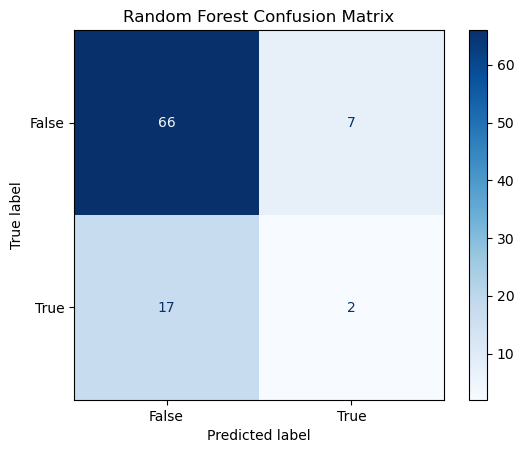

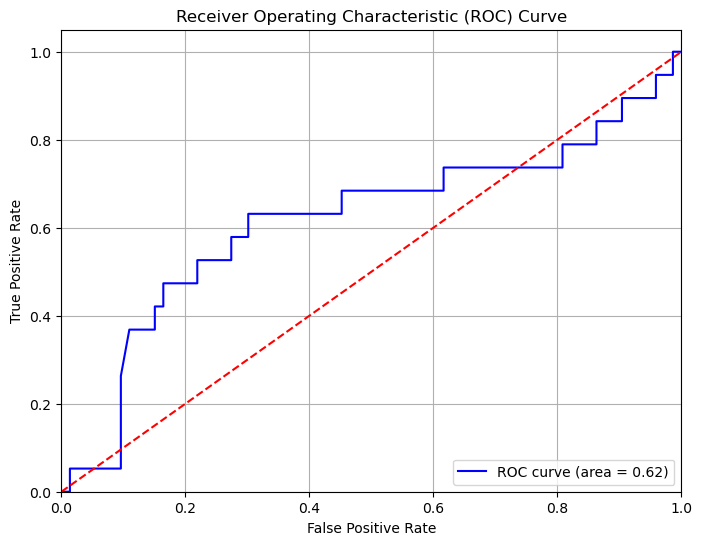

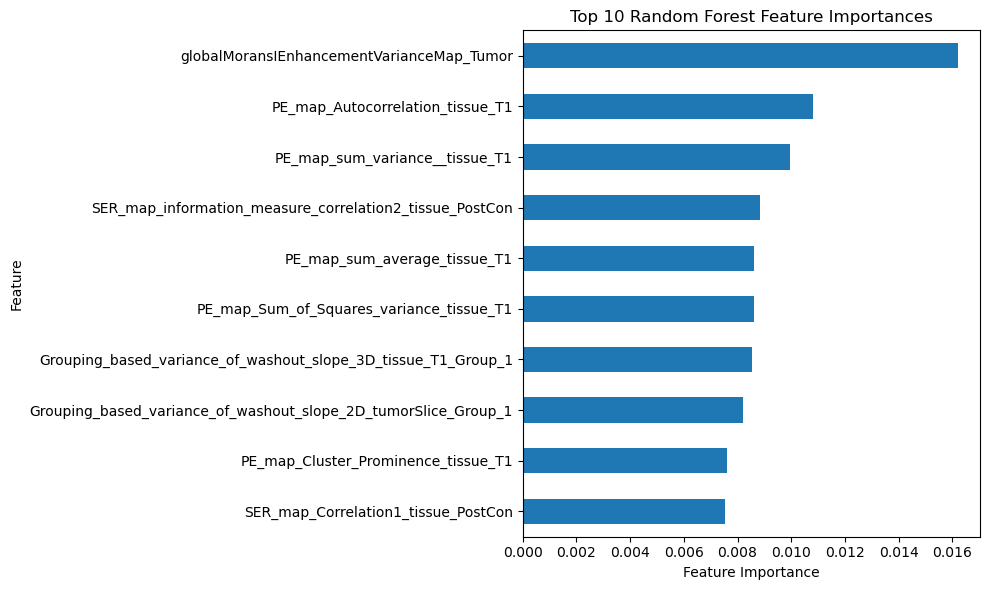

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train_res)

print('test acc:', rf.score(X_test, y_test))
print('train acc:', rf.score(X_train, y_train_res))

# plot confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# plot top 10 feature importances
top_features = pd.Series(rf.feature_importances_, index=X.columns).nlargest(10)[::-1]
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Random Forest Feature Importances')
plt.tight_layout()
plt.show()